## **Yolov9 Model Training on Custom Dataset**

#### Used **Aquarium Dataset** from Roboflow

Download link: https://public.roboflow.com/object-detection/aquarium

## Let us mount our Colab with Google drive

To use the data uploaded on our drive and to save the results generated after the model training, wwe need to mount the google drive with colab as by default colab saves it here but with the change in runtime the data delets itself

In [ ]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
!nvidia-smi

Thu Jun  6 18:06:31 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

**NOTE:** To make it easier for us to manage datasets, images and models we create a `HOME` constant.

In [ ]:
import os
HOME = "/content/drive/MyDrive/yolov9"
print(HOME)

/content/drive/MyDrive/yolov9


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/yolov9

/content/drive/MyDrive/yolov9


## Clone and Install

**NOTE:** YOLOv9 is very new. At the moment, we recommend using a fork of the main repository. The `detect.py` script contains a bug that prevents inference. This bug is patched in the fork.

In [ ]:
!git clone https://github.com/SkalskiP/yolov9.git


Cloning into 'yolov9'...
remote: Enumerating objects: 325, done.
remote: Counting objects: 100% (218/218), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 325 (delta 159), reused 156 (delta 156), pack-reused 107
Receiving objects: 100% (325/325), 2.23 MiB | 8.32 MiB/s, done.
Resolving deltas: 100% (165/165), done.


In [ ]:
%cd yolov9
!pip install -r requirements.txt -q

/content/drive/MyDrive/yolov9/yolov9


## Download model weights

**NOTE:** In the YOLOv9 paper, versions `yolov9-s` and `yolov9-m` are also mentioned, but the weights for these models are not yet available in the YOLOv9 [repository](https://github.com/WongKinYiu/yolov9).

In [ ]:
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.pt

In [ ]:
!ls -la {HOME}/weights

total 402426
-rw------- 1 root root  51508261 Feb 18 12:36 gelan-c.pt
-rw------- 1 root root 117203713 Feb 18 12:36 gelan-e.pt
-rw------- 1 root root 103153312 Feb 18 12:36 yolov9-c.pt
-rw------- 1 root root 140217688 Feb 18 12:36 yolov9-e.pt


## Train Custom Model

In [45]:
#%cd {HOME}/yolov9
%cd {HOME}

!python yolov9/train.py \
--batch 8 --epochs 50 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
--data /content/drive/MyDrive/Aquarium_dataset/data.yaml \
--weights {HOME}/weights/gelan-c.pt \
--cfg yolov9/models/detect/gelan-c.yaml \
--hyp yolov9/data/hyps/hyp.scratch-high.yaml

/content/drive/MyDrive/yolov9
2024-06-06 20:34:23.616037: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-06 20:34:23.616087: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-06 20:34:23.617451: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-06 20:34:23.624856: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-06 20:3

## Examine Training Results

**NOTE:** By default, the results of each subsequent training sessions are saved in `{HOME}/yolov9/runs/train/`, in directories named `exp`, `exp2`, `exp3`, ... You can override this behavior by using the `--name` parameter.

In [ ]:
!ls {HOME}/yolov9/runs/train/exp/

events.out.tfevents.1717699055.97933b0cce6a.10623.0  hyp.yaml  opt.yaml  weights


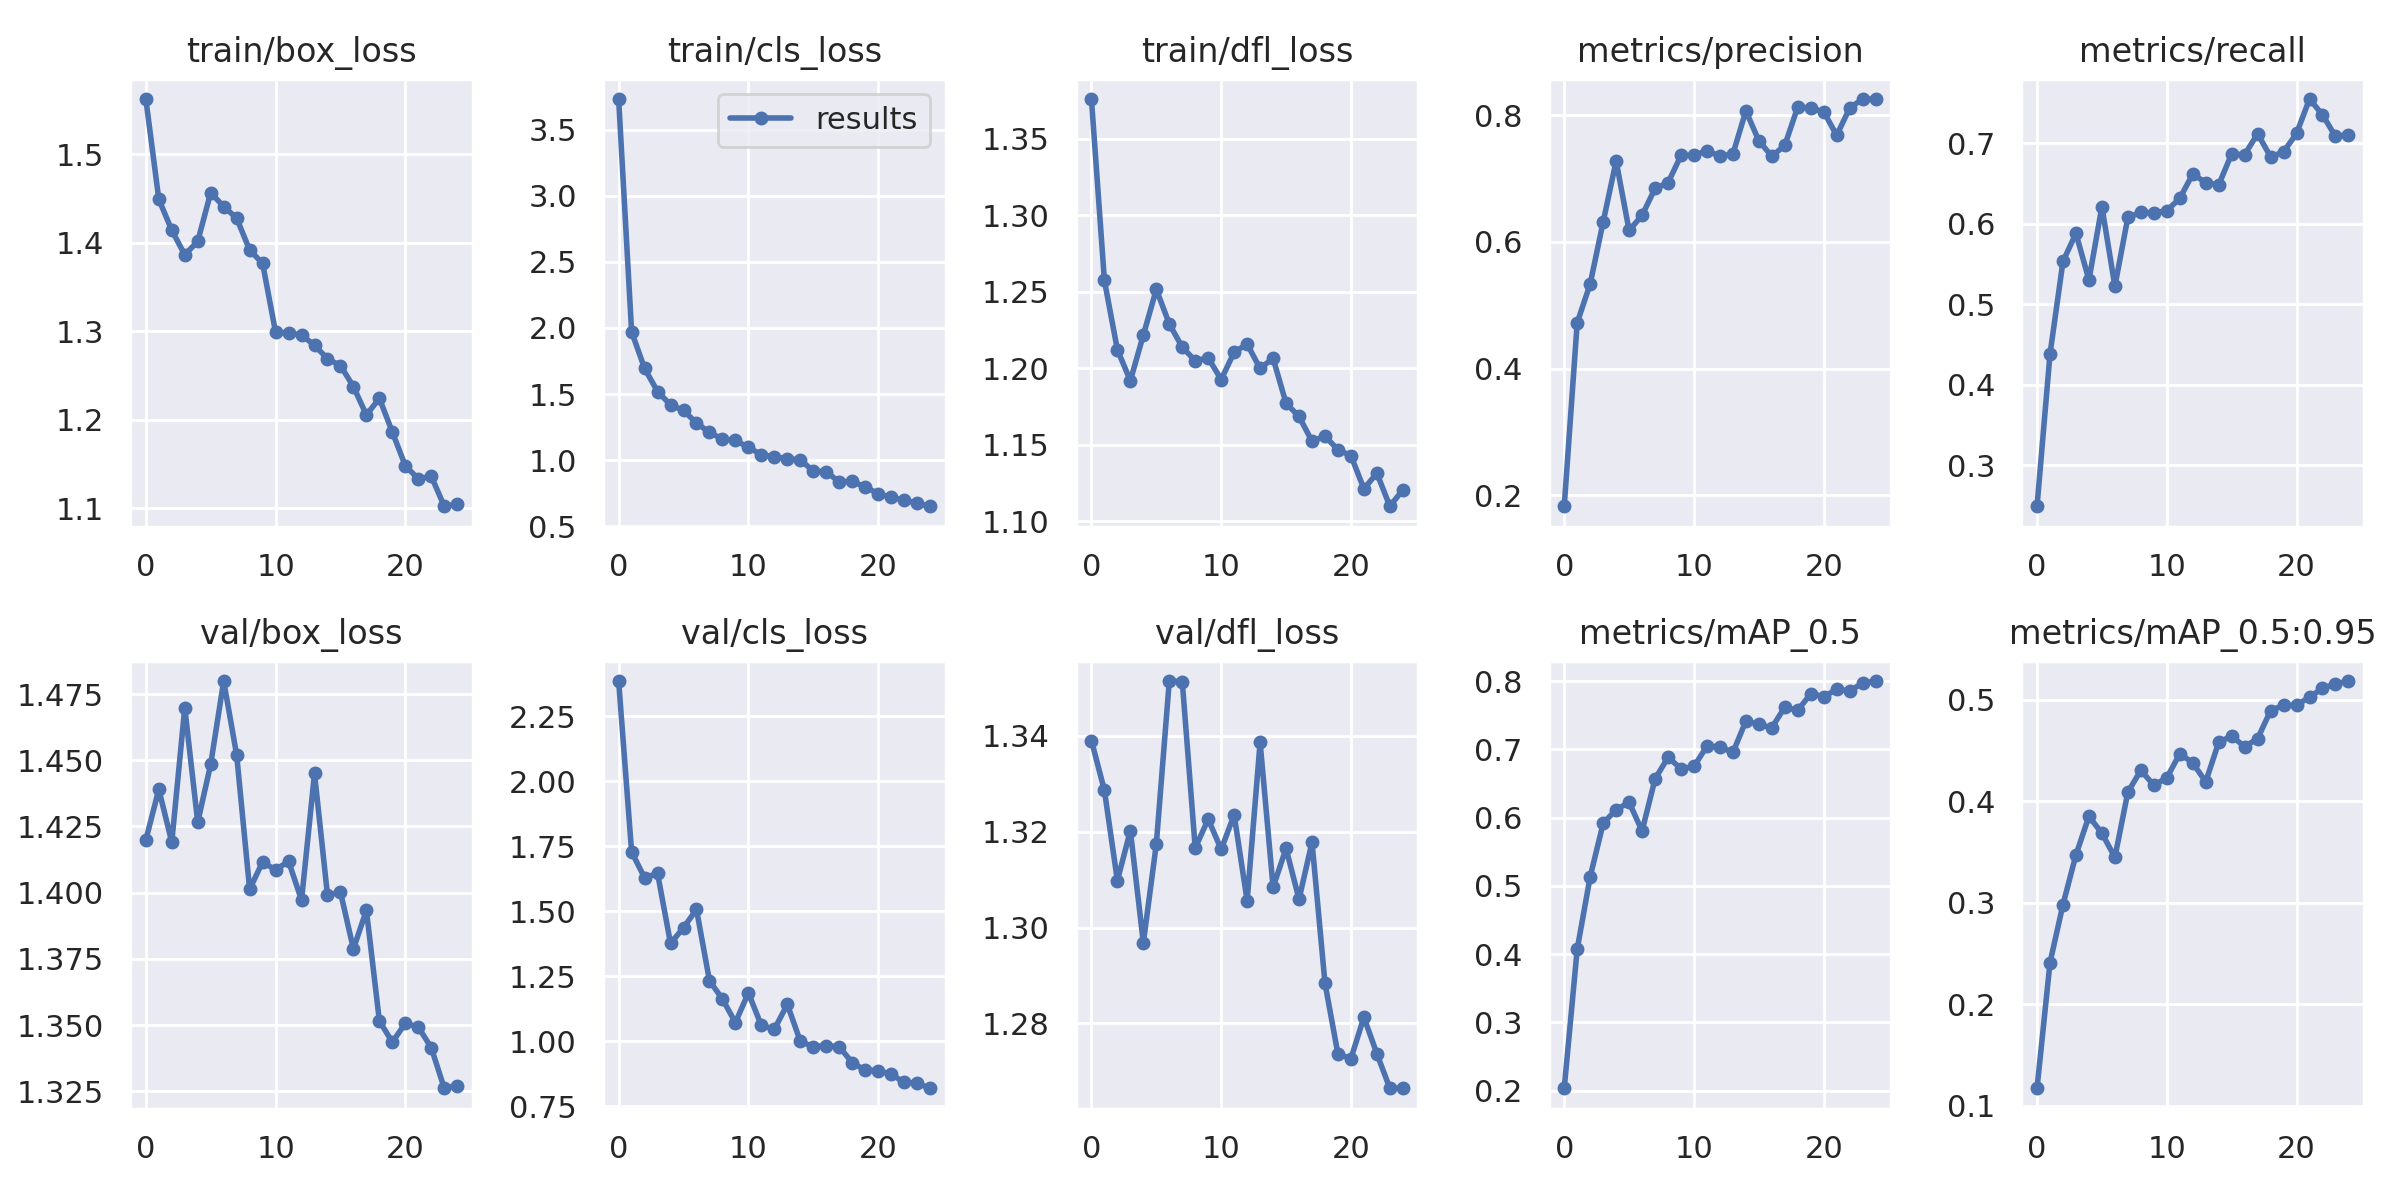

In [ ]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp3/results.png", width=1000)

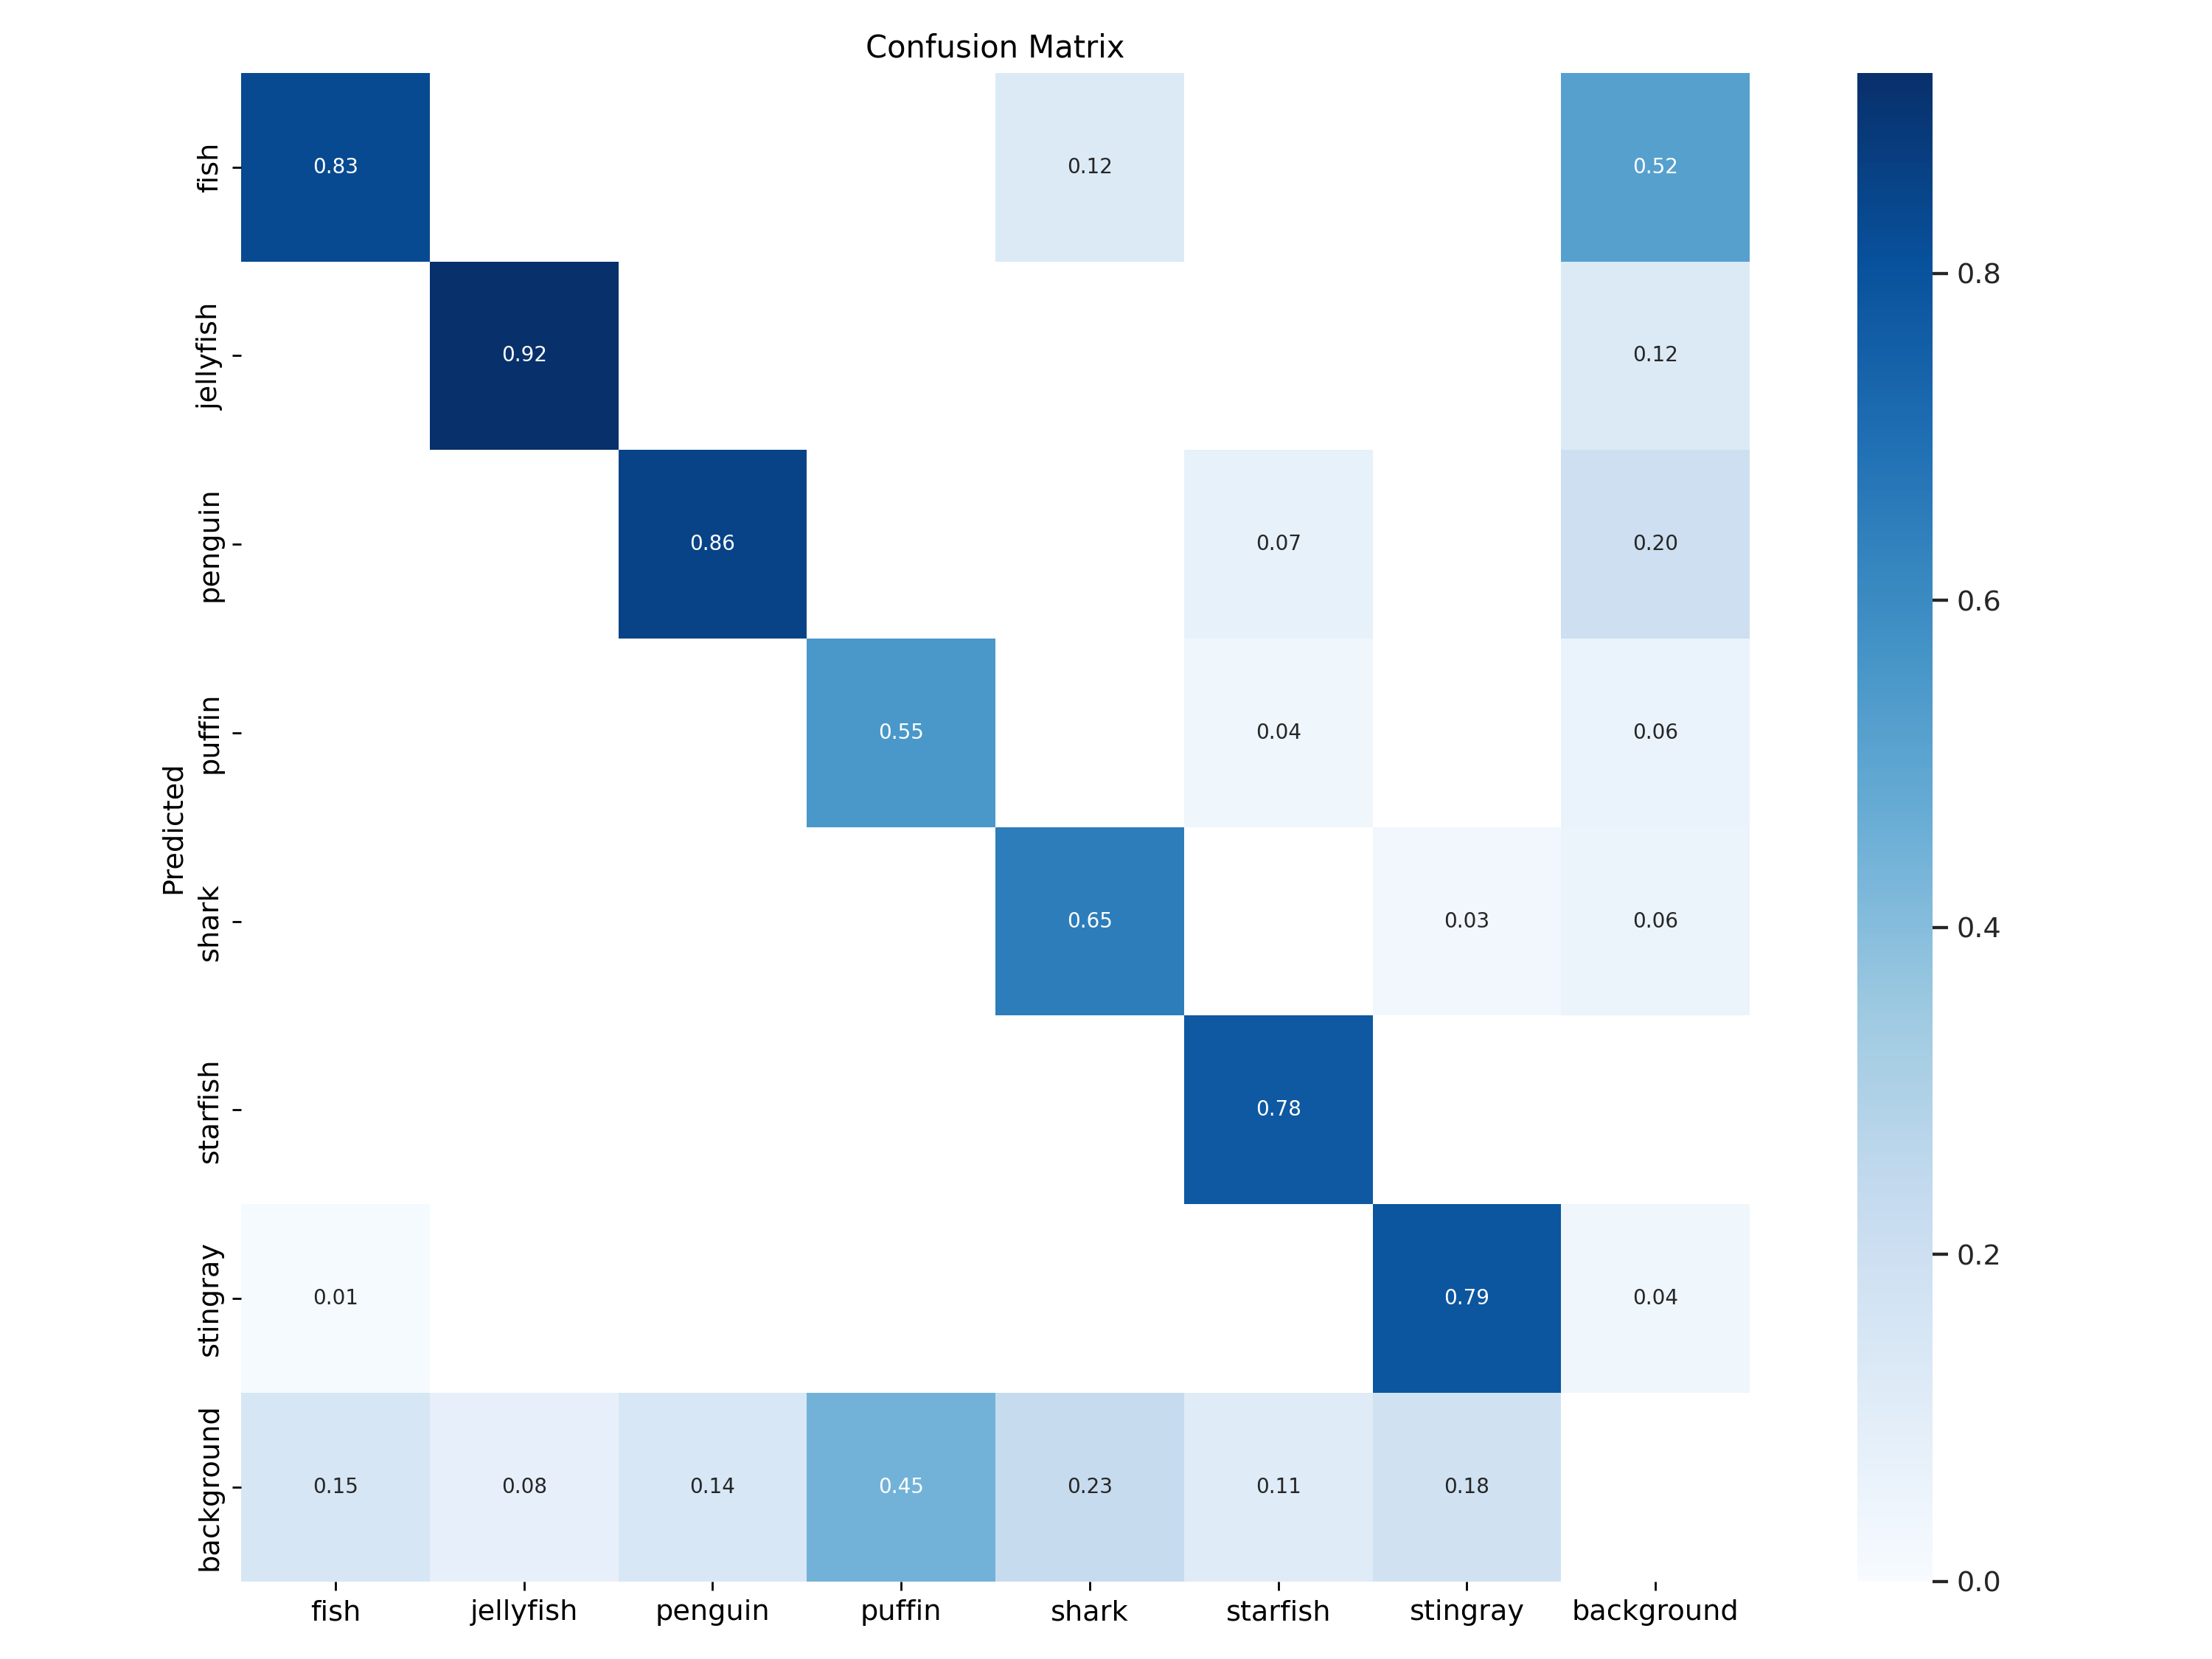

In [ ]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp3/confusion_matrix.png", width=1000)

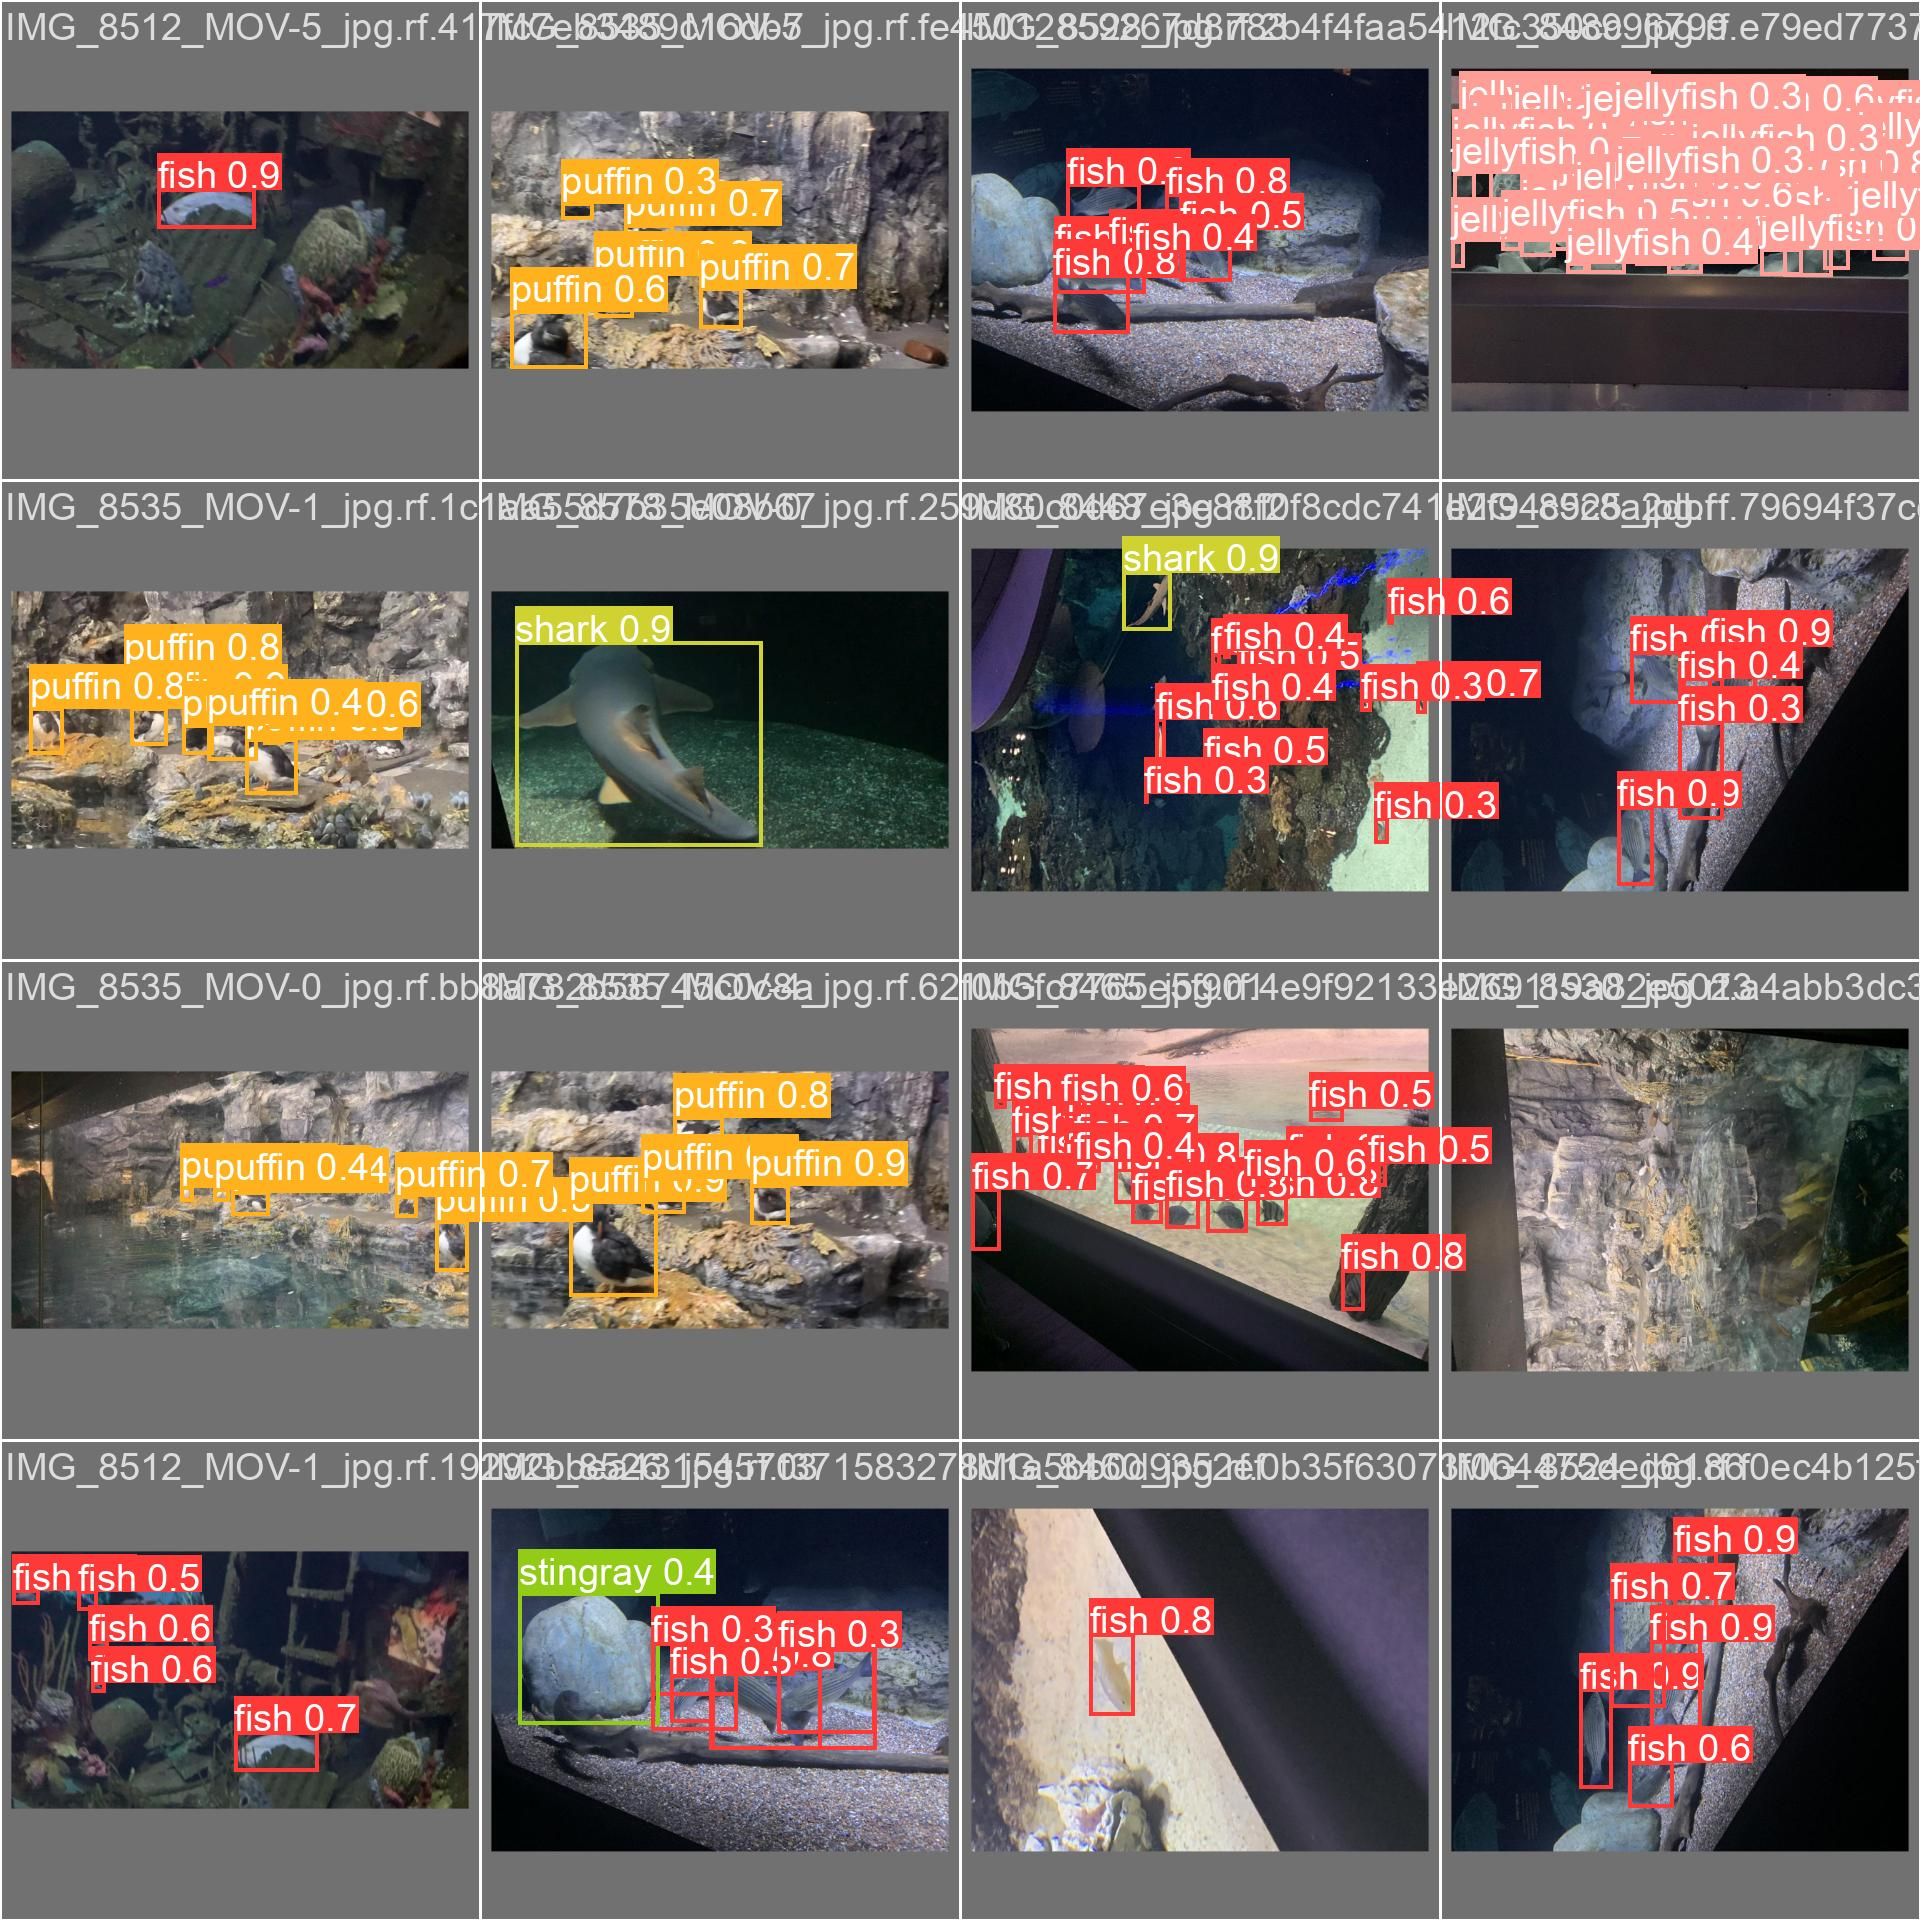

In [ ]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp3/val_batch0_pred.jpg", width=1000)

## Validate Custom Model

In [ ]:
#%cd {HOME}/yolov9
%cd {HOME}

!python yolov9/val.py \
--img 640 --batch 32 --conf 0.001 --iou 0.7 --device 0 \
--data /content/drive/MyDrive/Aquarium_dataset/data.yaml \
--weights {HOME}/yolov9/runs/train/exp3/weights/best.pt

/content/drive/MyDrive/yolov9
val: data=/content/drive/MyDrive/Aquarium_dataset/data.yaml, weights=['/content/drive/MyDrive/yolov9/yolov9/runs/train/exp3/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.7, max_det=300, task=val, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=yolov9/runs/val, name=exp, exist_ok=False, half=False, dnn=False, min_items=0
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
gelan-c summary: 467 layers, 25416357 parameters, 0 gradients, 102.5 GFLOPs
val: Scanning /content/drive/MyDrive/Aquarium_dataset/valid/labels.cache... 127 images, 0 backgrounds, 0 corrupt: 100% 127/127 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 4/4 [00:14<00:00,  3.63s/it]
                   all        127        909       0.82      0.716        0.8   

## Inference with Custom Model

In [ ]:
!python yolov9/detect.py \
--img 1280 --conf 0.25 --device 0 \
--weights {HOME}/yolov9/runs/train/exp3/weights/best.pt \
--source /content/drive/MyDrive/Aquarium_dataset/test/images

detect: weights=['/content/drive/MyDrive/yolov9/yolov9/runs/train/exp3/weights/best.pt'], source=/content/drive/MyDrive/Aquarium_dataset/test/images, data=yolov9/data/coco128.yaml, imgsz=[1280, 1280], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov9/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
gelan-c summary: 467 layers, 25416357 parameters, 0 gradients, 102.5 GFLOPs
image 1/63 /content/drive/MyDrive/Aquarium_dataset/test/images/IMG_2289_jpeg_jpg.rf.fe2a7a149e7b11f2313f5a7b30386e85.jpg: 1280x960 1 fish, 1 penguin, 1 shark, 97.2ms
image 2/63 /content/drive/MyDrive/Aquarium_dataset/test/images/IMG_2301_jpeg_jpg.rf.2c19ae5efbd1f86

**NOTE:** Just like behore, the inference results have been saved in the appropriate directory inside `{HOME}/yolov9/runs/detect/`. Let's examine few of those results.

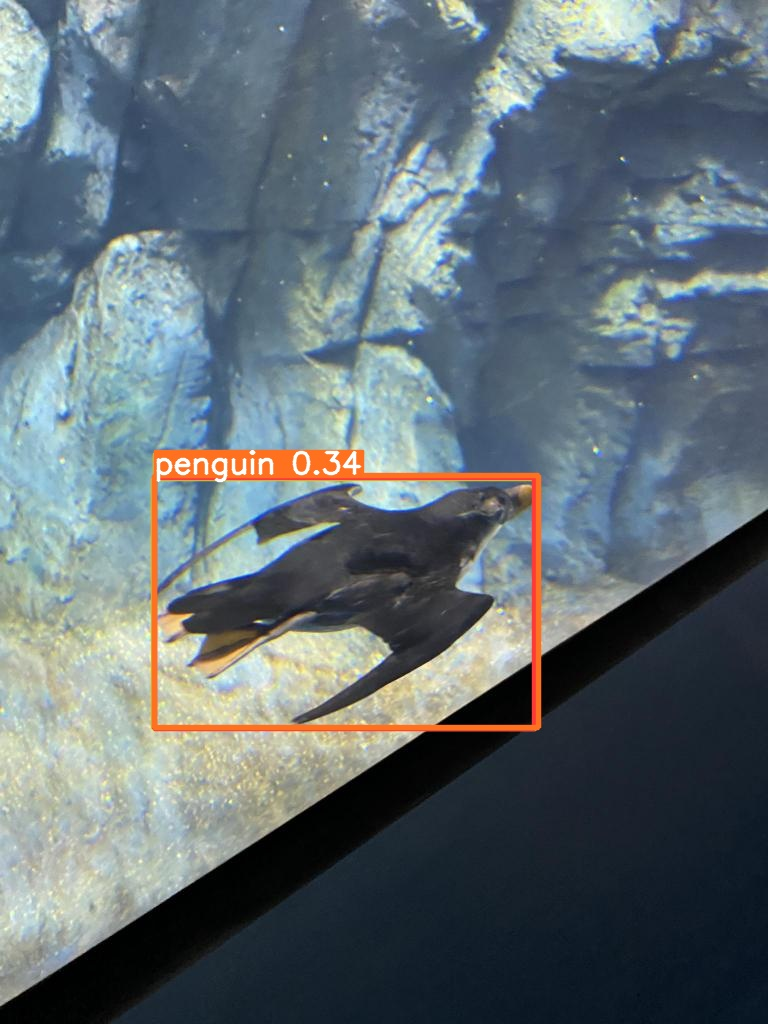

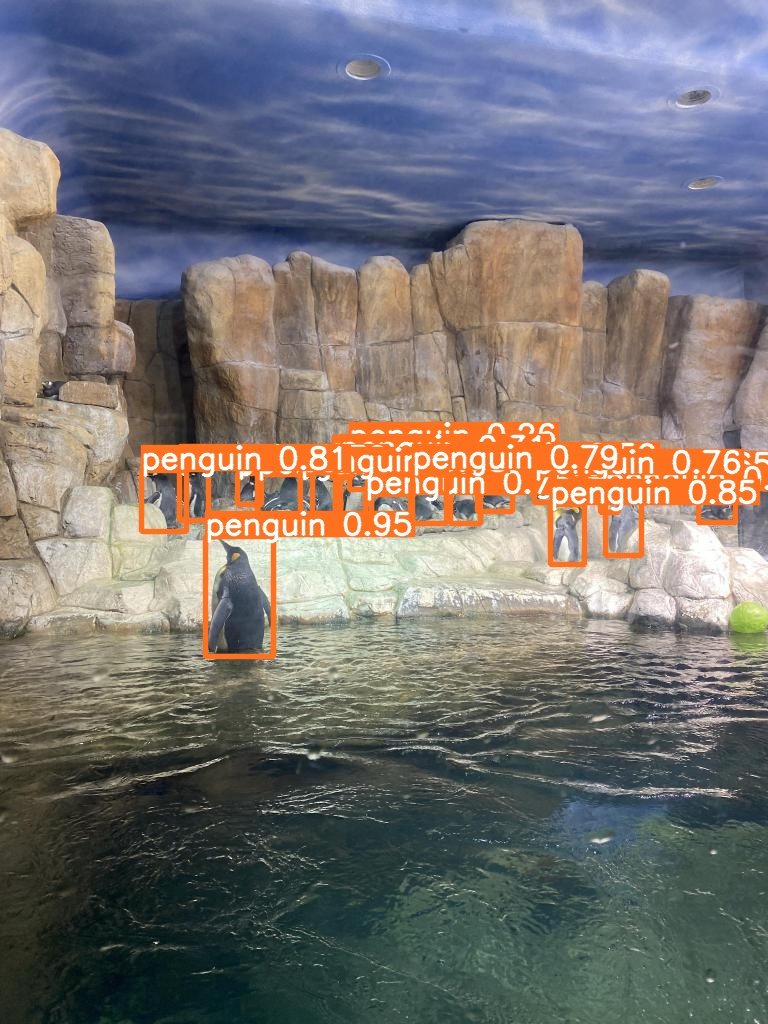

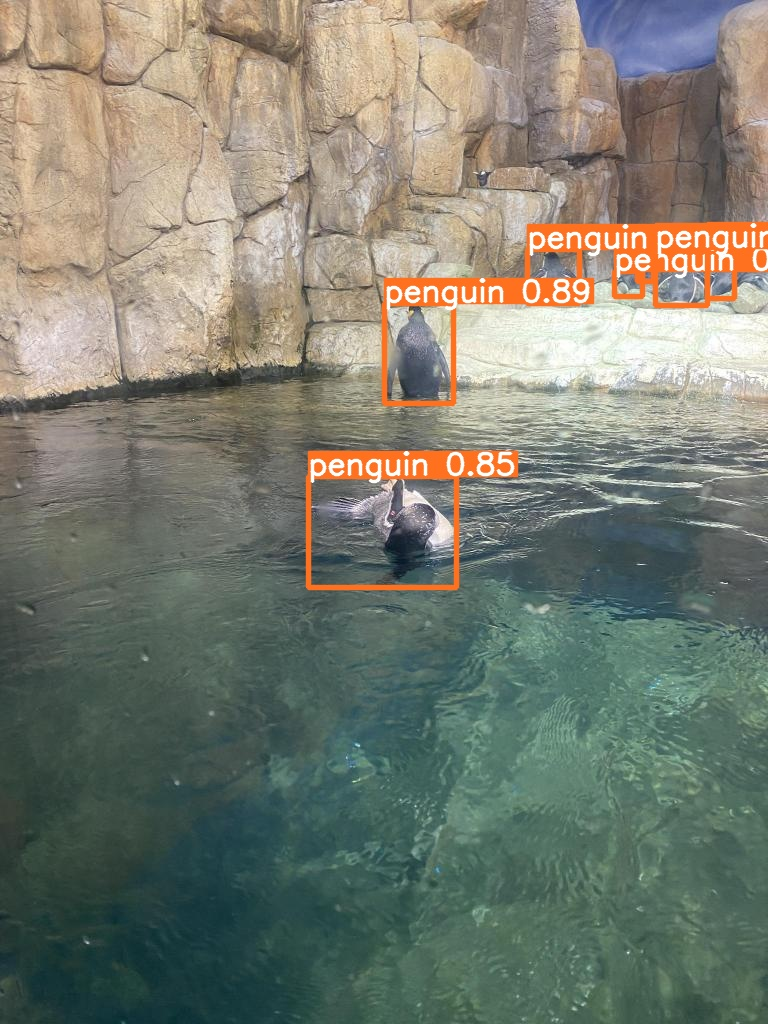

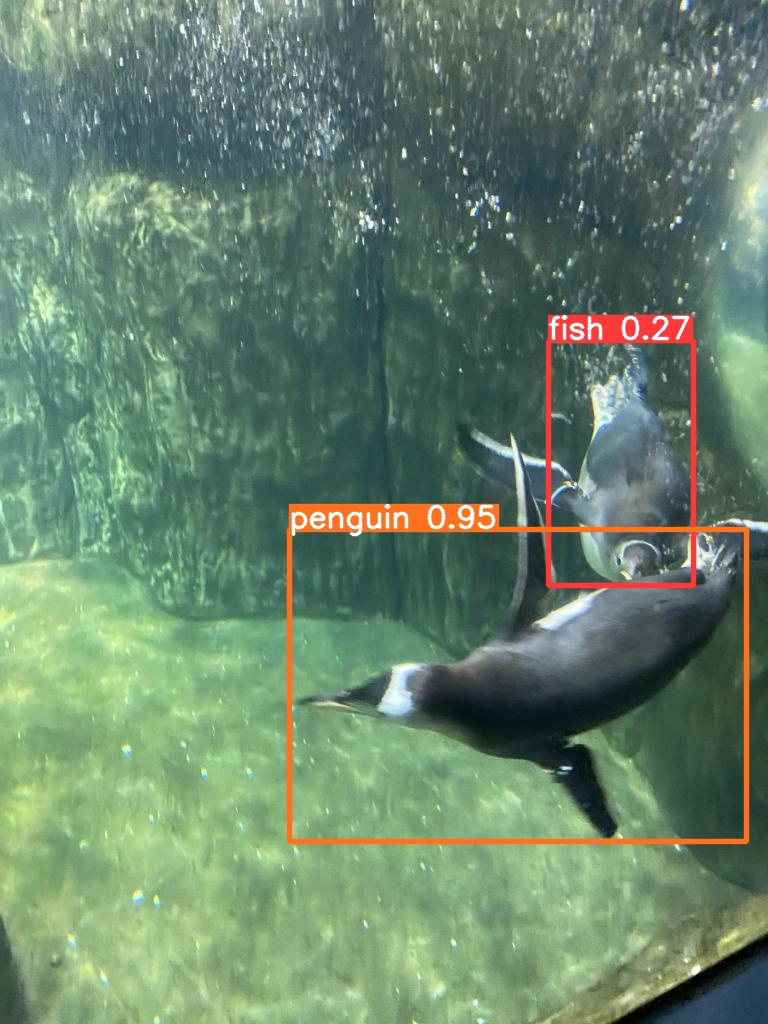

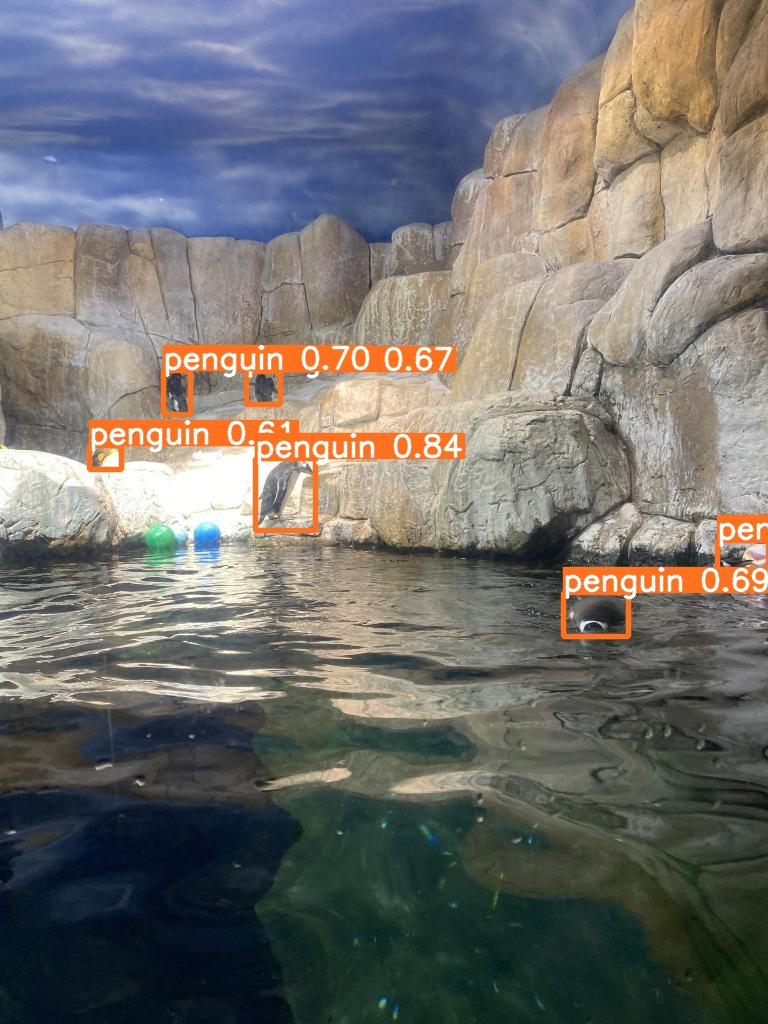

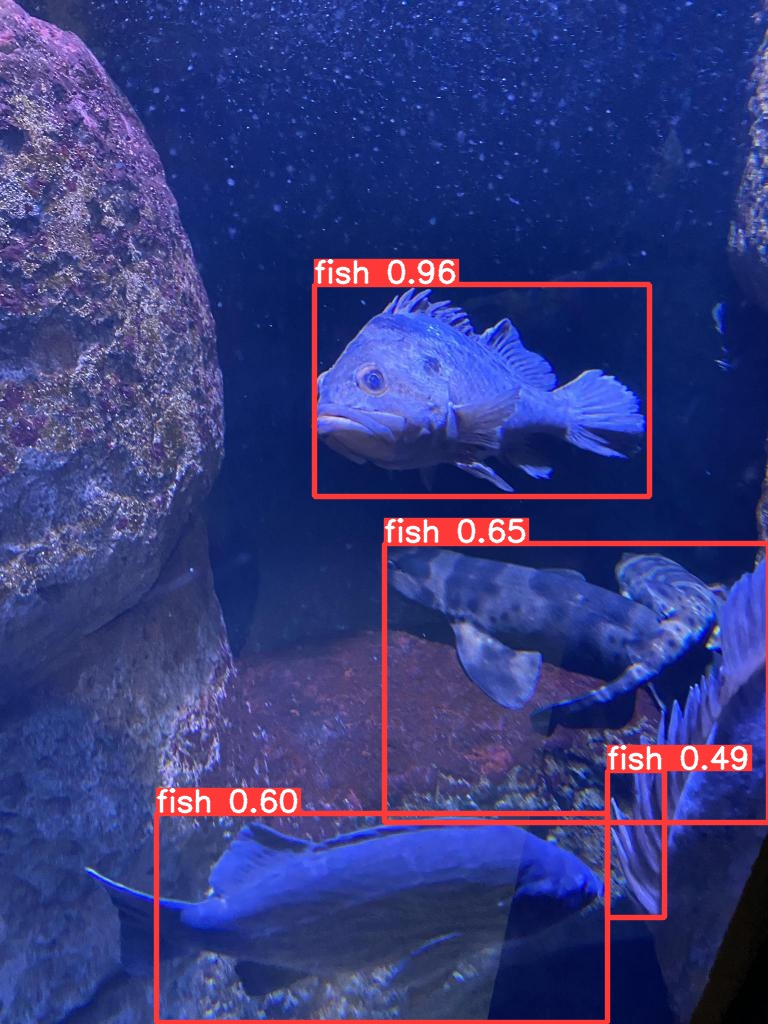

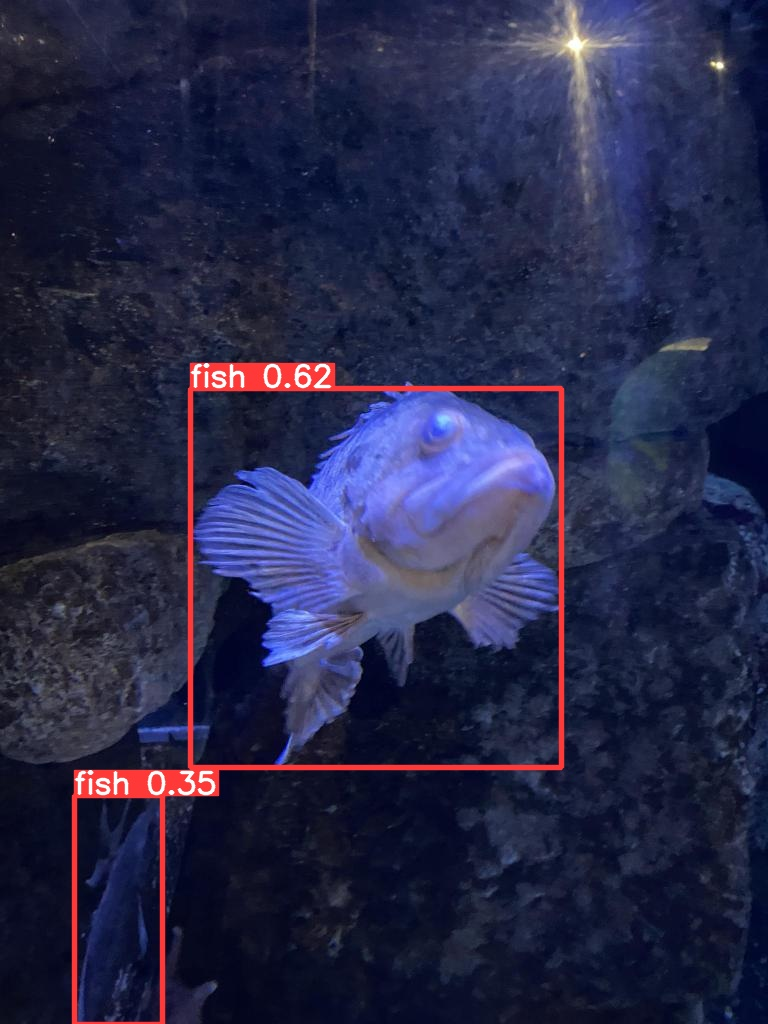

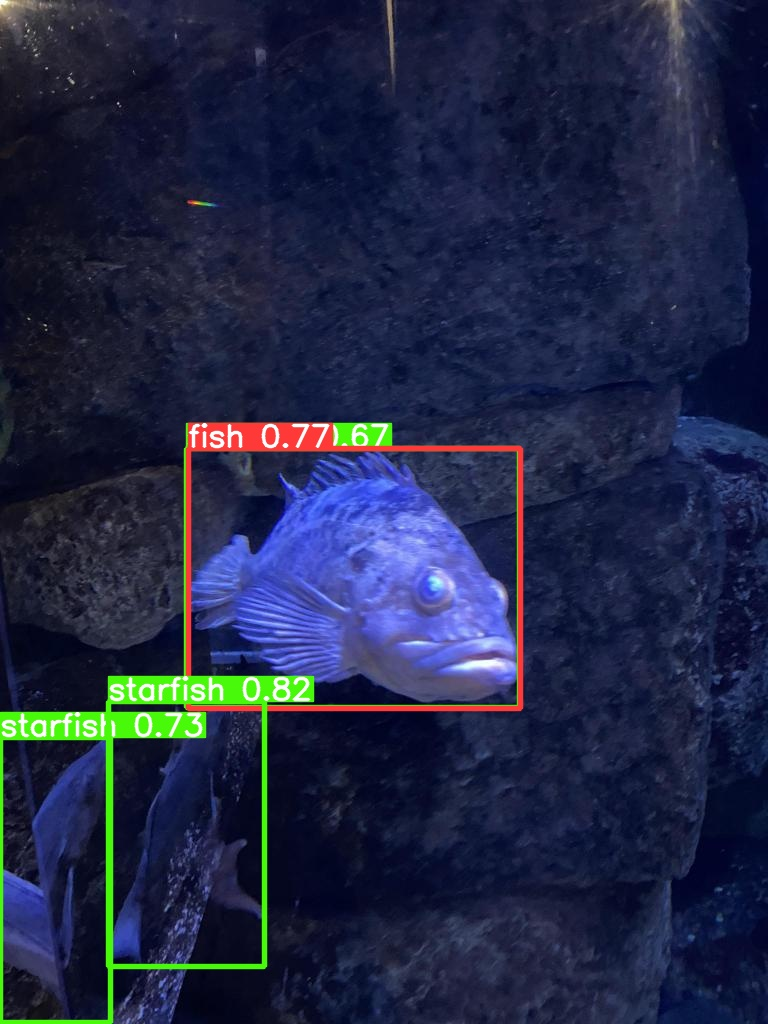

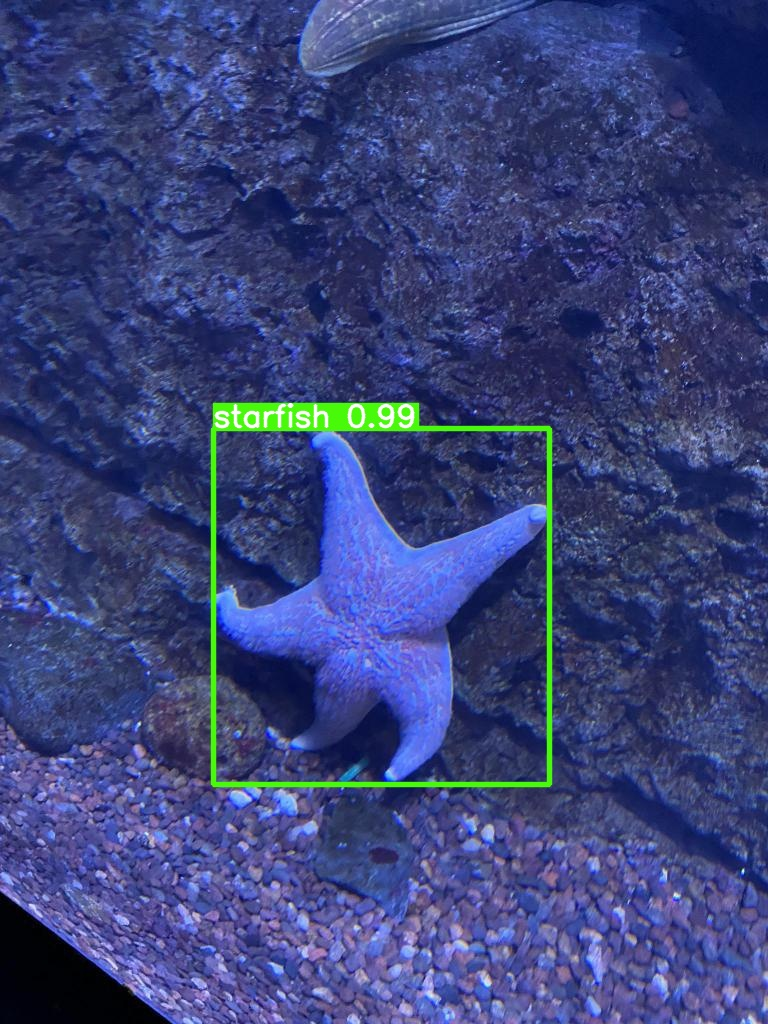

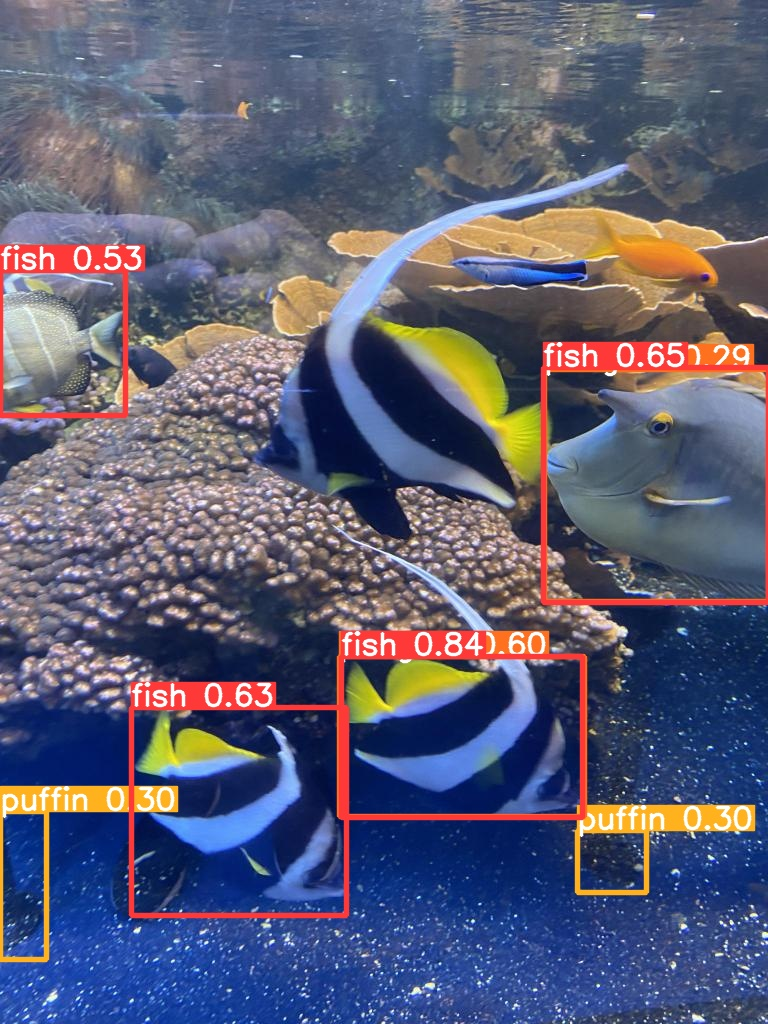

In [ ]:
import glob

from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/yolov9/runs/detect/exp3/*.jpg')[:10]:
      display(Image(filename=image_path, width=600))